# Data Exploration on MovieLens25M Data

## Initialize

### Download the dataset

In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH" -O ./data/MovieLens25M/genome-scores.csv && rm -rf /tmp/cookies.txt
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH' -O ./data/MovieLens25M/genome-scores.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BXpm5PhinwhoD9x8wgiM-H7IjHD1NxDc' -O ./data/MovieLens25M/genome-tags.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sDu8Tk2Ut9ytMT2lgmokKw3Zx4T9BX5T' -O ./data/MovieLens25M/links.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1j6gwSxbeOBULLdKbVVBw0QbRHAO_JXLv' -O ./data/MovieLens25M/movies.csv
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ" -O ./data/MovieLens25M/ratings.csv && rm -rf /tmp/cookies.txt
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ' -O ./data/MovieLens25M/ratings.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LVAaiQv9XE8pV8k3wU9RAhbWH-xOCqU3' -O ./data/MovieLens25M/tags.csv

--2022-10-27 10:41:21--  https://docs.google.com/uc?export=download&confirm=t&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH
Resolving docs.google.com (docs.google.com)... 172.217.27.46
Connecting to docs.google.com (docs.google.com)|172.217.27.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0m3u1risj37gkml20a7rlv5pio7jnk4v/1666838475000/17238539596940499087/*/1995d1KMvceeYO7g9oFTA90VbfKO1mAGH?e=download&uuid=a1364b0c-799d-4d75-a33d-327e0117c793 [following]
--2022-10-27 10:41:22--  https://doc-04-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0m3u1risj37gkml20a7rlv5pio7jnk4v/1666838475000/17238539596940499087/*/1995d1KMvceeYO7g9oFTA90VbfKO1mAGH?e=download&uuid=a1364b0c-799d-4d75-a33d-327e0117c793
Resolving doc-04-4c-docs.googleusercontent.com (doc-04-4c-docs.googleusercontent.com)... 142.250.199.65
Connecting to doc-04-4c-docs.googleuserc

### Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# define the paths
data_path = '../data/MovieLens25M/'

### Read Data

In [3]:
df_rating = pd.read_csv(data_path+'ratings.csv')
df_rating.head()

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

In [4]:
df_movies = pd.read_csv(data_path+'movies.csv')
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

### Understanding the data

In [5]:
df_rating.head()

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

In [6]:
df_rating.tail()

userId  movieId  rating   timestamp
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515

In [7]:
df_rating.shape

(25000095, 4)

In [8]:
df_rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [10]:
df_movies.tail()

movieId                           title                  genres
62418   209157                       We (2018)                   Drama
62419   209159       Window of the Soul (2001)             Documentary
62420   209163                Bad Poems (2018)            Comedy|Drama
62421   209169             A Girl Thing (2001)      (no genres listed)
62422   209171  Women of Devil's Island (1962)  Action|Adventure|Drama

In [11]:
df_movies.shape

(62423, 3)

In [12]:
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [13]:
m_movies = df_rating['movieId'].nunique()
n_users = df_rating['userId'].nunique()
n_ratings = len(df_rating)
n_timestamp = df_rating['timestamp'].nunique()
unique_rate = df_rating['rating'].unique()

In [14]:
print("=== Const Values of the data ===")
print(f"Nnumber of movies: {m_movies}")
print(f"Number of users: {n_users}")
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique timestamp: {n_timestamp}")
print(f"Users can rate movies with in {sorted(unique_rate)}")
print("=== End of Const Values of the data ===")

=== Const Values of the data ===
Nnumber of movies: 59047
Number of users: 162541
Number of ratings: 25000095
Number of unique timestamp: 20115267
Users can rate movies with in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
=== End of Const Values of the data ===


#### Observations
- Nnumber of movies: 59047
- Number of users: 162541
- Number of ratings: 25000095
- Users can rate movies with in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

### Clean up data

Check whether the rating file contains null data

In [15]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

#### Observations
- From the above result, there are no missing data from the rating and movies csv file

However, the timestamp column from the rating table use seconds since 01-01-1970 UTC to represent the datetime, which is not intuitive to human. Therefore, we decide to convert it to data datatype.

In [ ]:
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'],unit='s').dt.date

In [ ]:
df_rating.rename(columns={'timestamp': 'date'}, inplace=True)
df_rating.head()

userId  movieId  rating        date
0       1      296     5.0  2006-05-17
1       1      306     3.5  2006-05-17
2       1      307     5.0  2006-05-17
3       1      665     5.0  2006-05-17
4       1      899     3.5  2006-05-17

## Exploration

In this section, we will find the number of users, ratings, unique dates and movies in the dataset

In [ ]:
numOfMovies = df_rating['movieId'].nunique()
numOfUsers = df_rating['userId'].nunique()
numOfRatings = len(df_rating)

In [ ]:
print(f"Number of movies been rated: {numOfMovies}")
print(f"Number of users have rated at least one movie: {numOfUsers}")
print(f"Number of ratings: {numOfRatings}")

Number of movies been rated: 59047
Number of users have rated at least one movie: 162541
Number of ratings: 25000095


In [ ]:
group_by_rating = df_rating.groupby('rating')
rating_counts = group_by_rating.count()
ratings = rating_counts['movieId']
print(ratings)

rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
Name: movieId, dtype: int64


In [ ]:
df_rating['rating'].describe()[1:]

mean    3.533854
std     1.060744
min     0.500000
25%     3.000000
50%     3.500000
75%     4.000000
max     5.000000
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Percentage of each rating'}, xlabel='rating', ylabel='Percentage'>

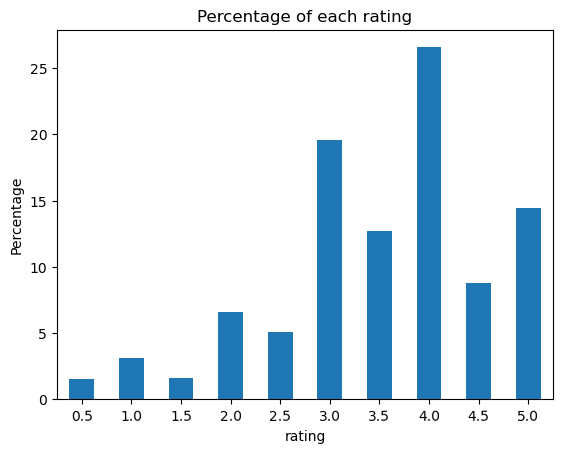

In [ ]:
percentage = ratings/n_ratings*100
percentage.plot.bar(title='Percentage of each rating', ylabel='Percentage', rot=1)

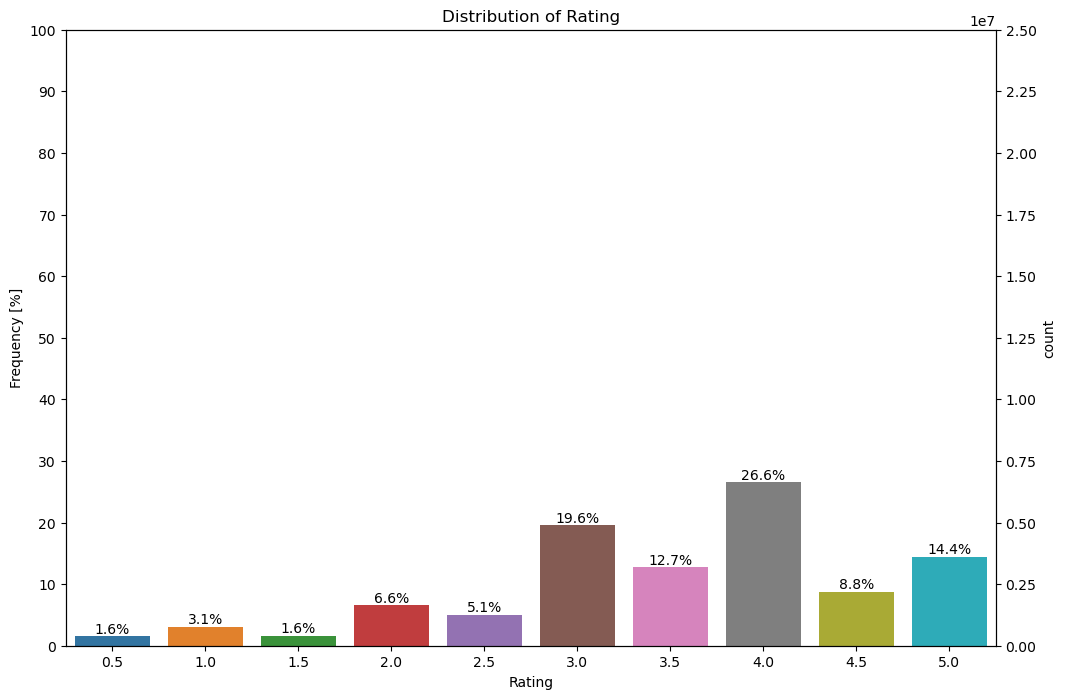

In [27]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='rating', data=df_rating)
plt.title('Distribution of Rating')
plt.xlabel('Rating')

ax2 = ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]
  ax.annotate('{:.1f}%'.format(100*y/n_ratings), (x.mean(), y), ha='center', va='bottom')

import matplotlib.ticker as ticker
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

ax2.set_ylim(0,100)
ax.set_ylim(0, n_ratings)

ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
# ax.ticklabel_format(style='plain', axis='y')
# ax2.grid(None)
plt.show()

#### Observations
- We can see that most users rate the movie with score 4 (26.6.7%), 3 (19.6%), 5 (14.4%).

In [28]:
df_rating.dtypes

userId       int64
movieId      int64
rating     float64
date        object
dtype: object

In [29]:
df_rating_str = df_rating.copy()
df_rating_str['rating'] = df_rating_str['rating'].astype(str)
df_rating_str.dtypes

userId      int64
movieId     int64
rating     object
date       object
dtype: object

In [30]:
df_rating_str

userId  movieId rating        date
0              1      296    5.0  2006-05-17
1              1      306    3.5  2006-05-17
2              1      307    5.0  2006-05-17
3              1      665    5.0  2006-05-17
4              1      899    3.5  2006-05-17
...          ...      ...    ...         ...
25000090  162541    50872    4.5  2009-04-28
25000091  162541    55768    2.5  2009-04-28
25000092  162541    56176    2.0  2009-04-28
25000093  162541    58559    4.0  2009-04-28
25000094  162541    63876    5.0  2009-04-28

[25000095 rows x 4 columns]

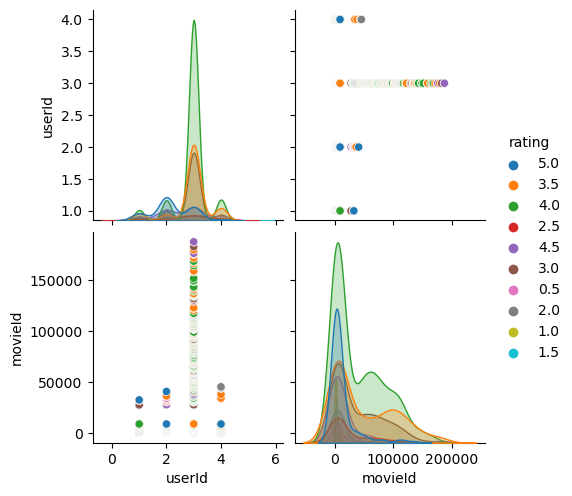

In [31]:
sns.pairplot(data=df_rating_str[:1000], hue='rating')

In [32]:
correlation = df_rating.corr()

<AxesSubplot:>

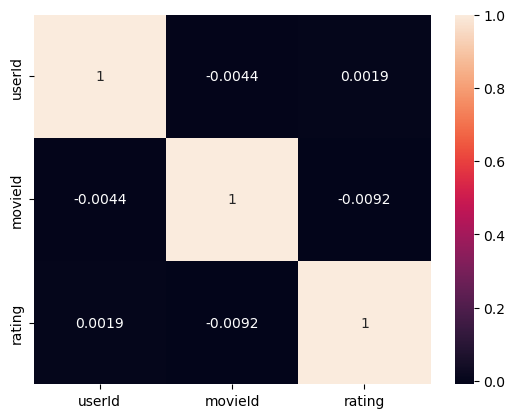

In [33]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

In [34]:
group_by_user = df_rating.groupby('userId')
group_by_movie = df_rating.groupby('movieId')
group_by_date = df_rating.groupby('date')

In [35]:
user = group_by_user['rating'].count()
movie = group_by_movie['rating'].count()
date = group_by_date['rating'].count()

/var/folders/mr/n0bkb0gj2wd5yx3hshv_zk8w0000gn/T/ipykernel_22852/1674002902.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


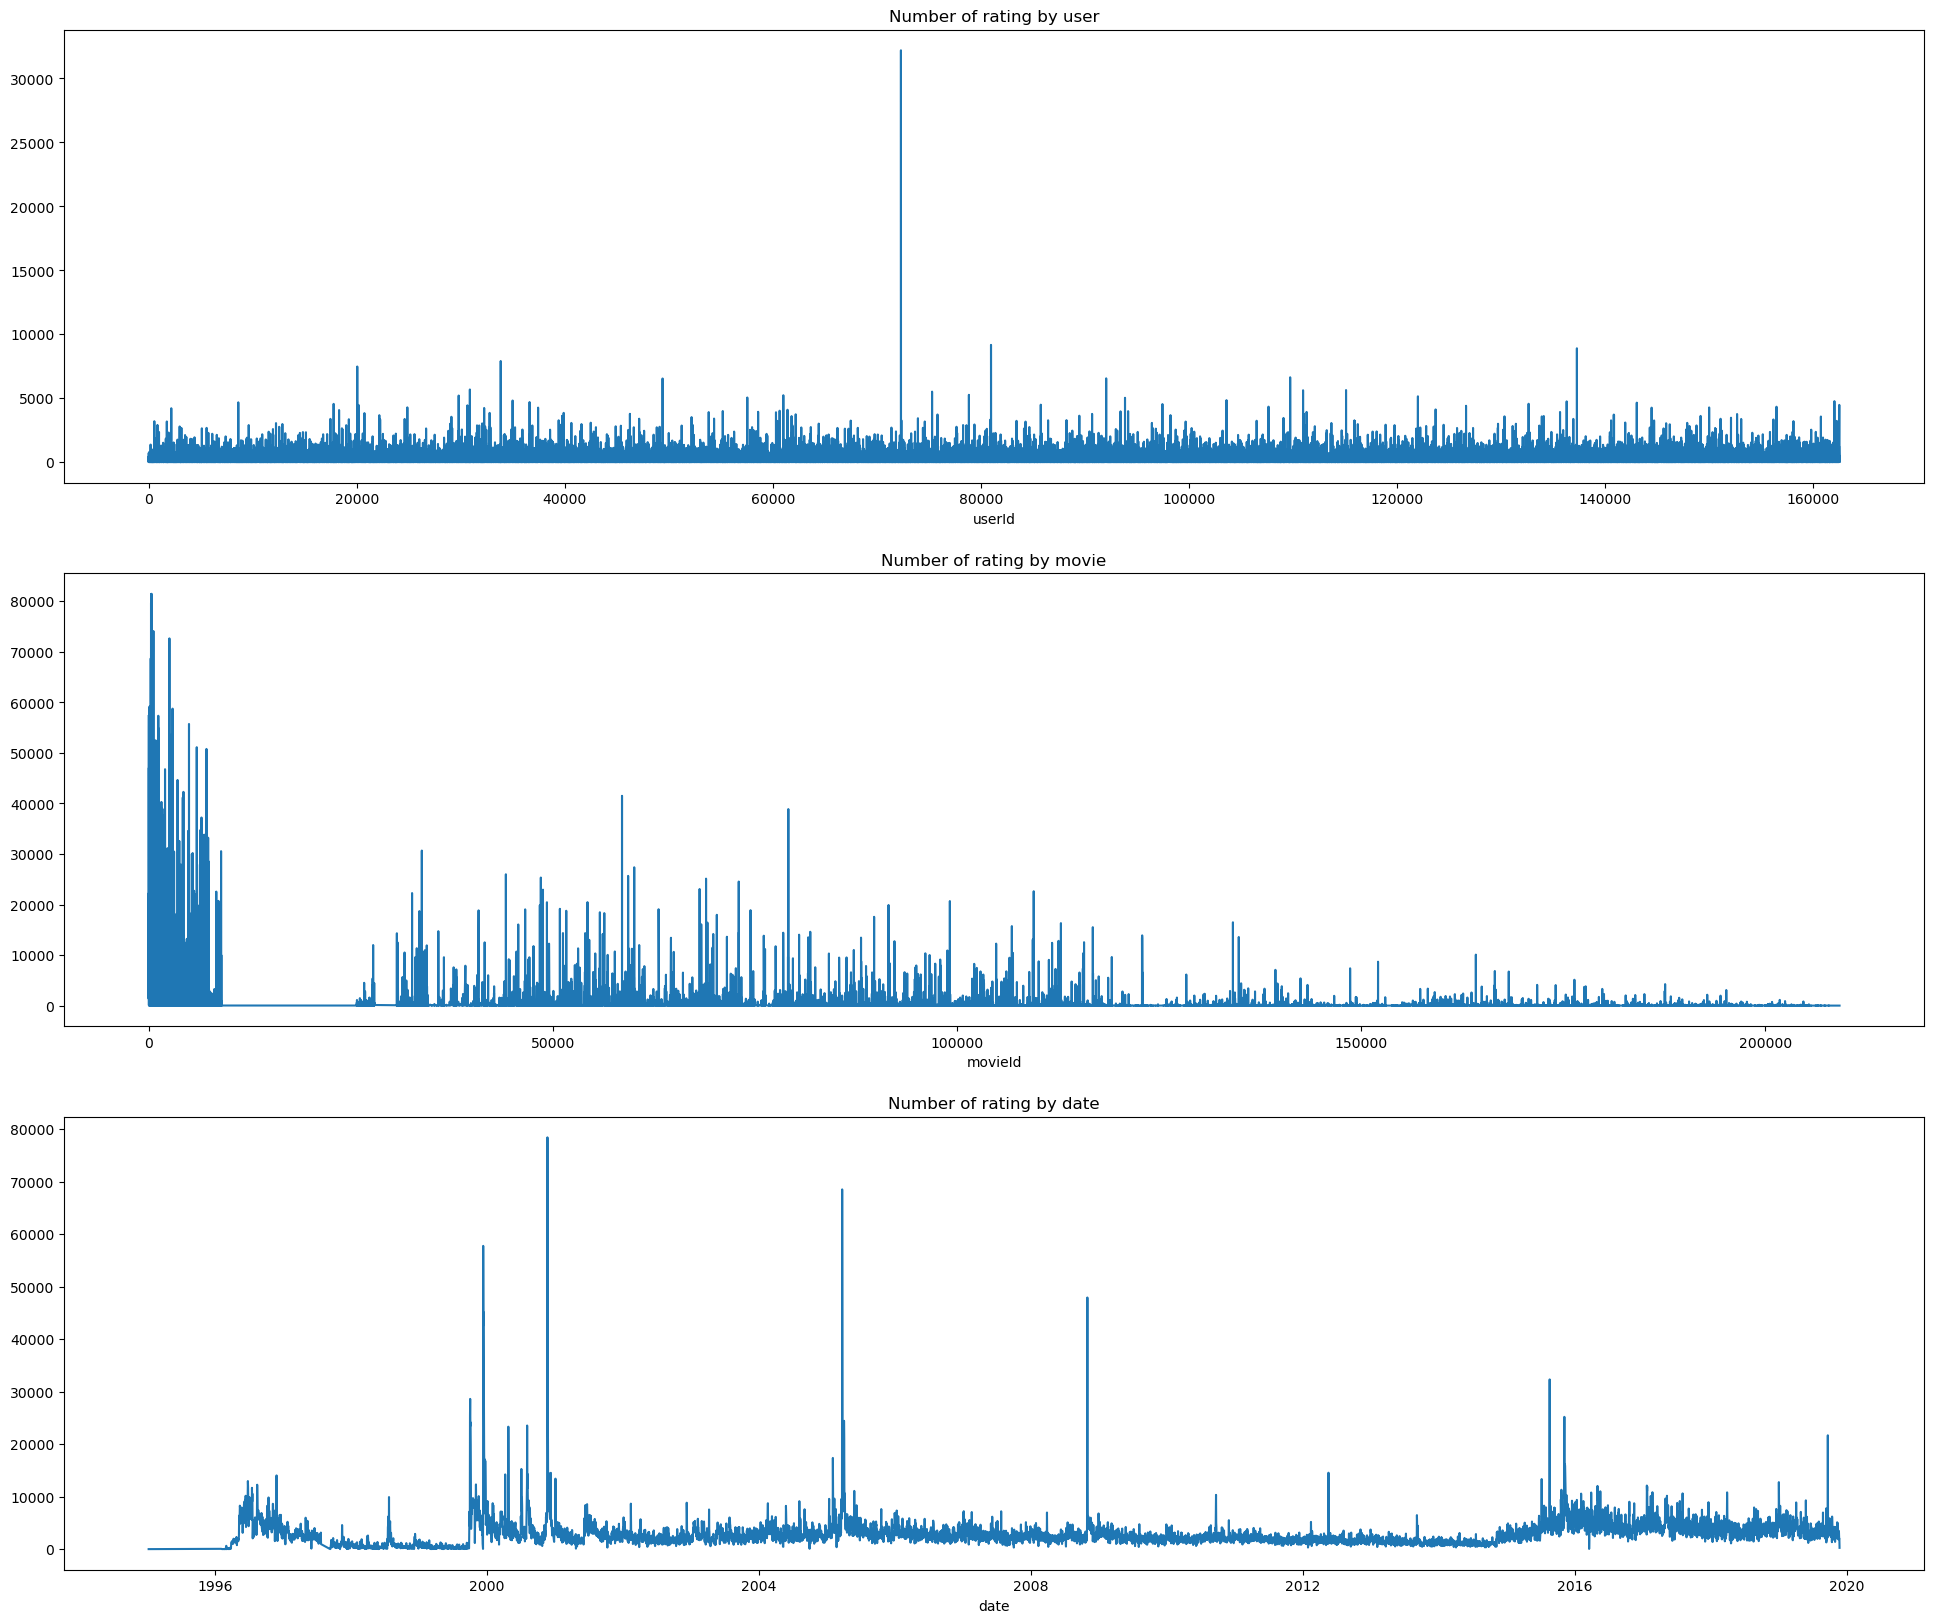

In [36]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(24,20))

user.plot(ax=ax[0])
movie.plot(ax=ax[1])
date.plot(ax=ax[2])

ax[0].set_title('Number of rating by user')
ax[1].set_title('Number of rating by movie')
ax[2].set_title('Number of rating by date')

fig.show()

In [37]:
user.describe()

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: rating, dtype: float64

In [38]:
movie.describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: rating, dtype: float64

In [39]:
date.describe()

count     8605.000000
mean      2905.298664
std       2732.089829
min          1.000000
25%       1546.000000
50%       2420.000000
75%       3642.000000
max      78444.000000
Name: rating, dtype: float64

In [40]:
def remove_outlier(df:pd.Series):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  _df = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
  return df[_df]


/var/folders/mr/n0bkb0gj2wd5yx3hshv_zk8w0000gn/T/ipykernel_22852/4144750609.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


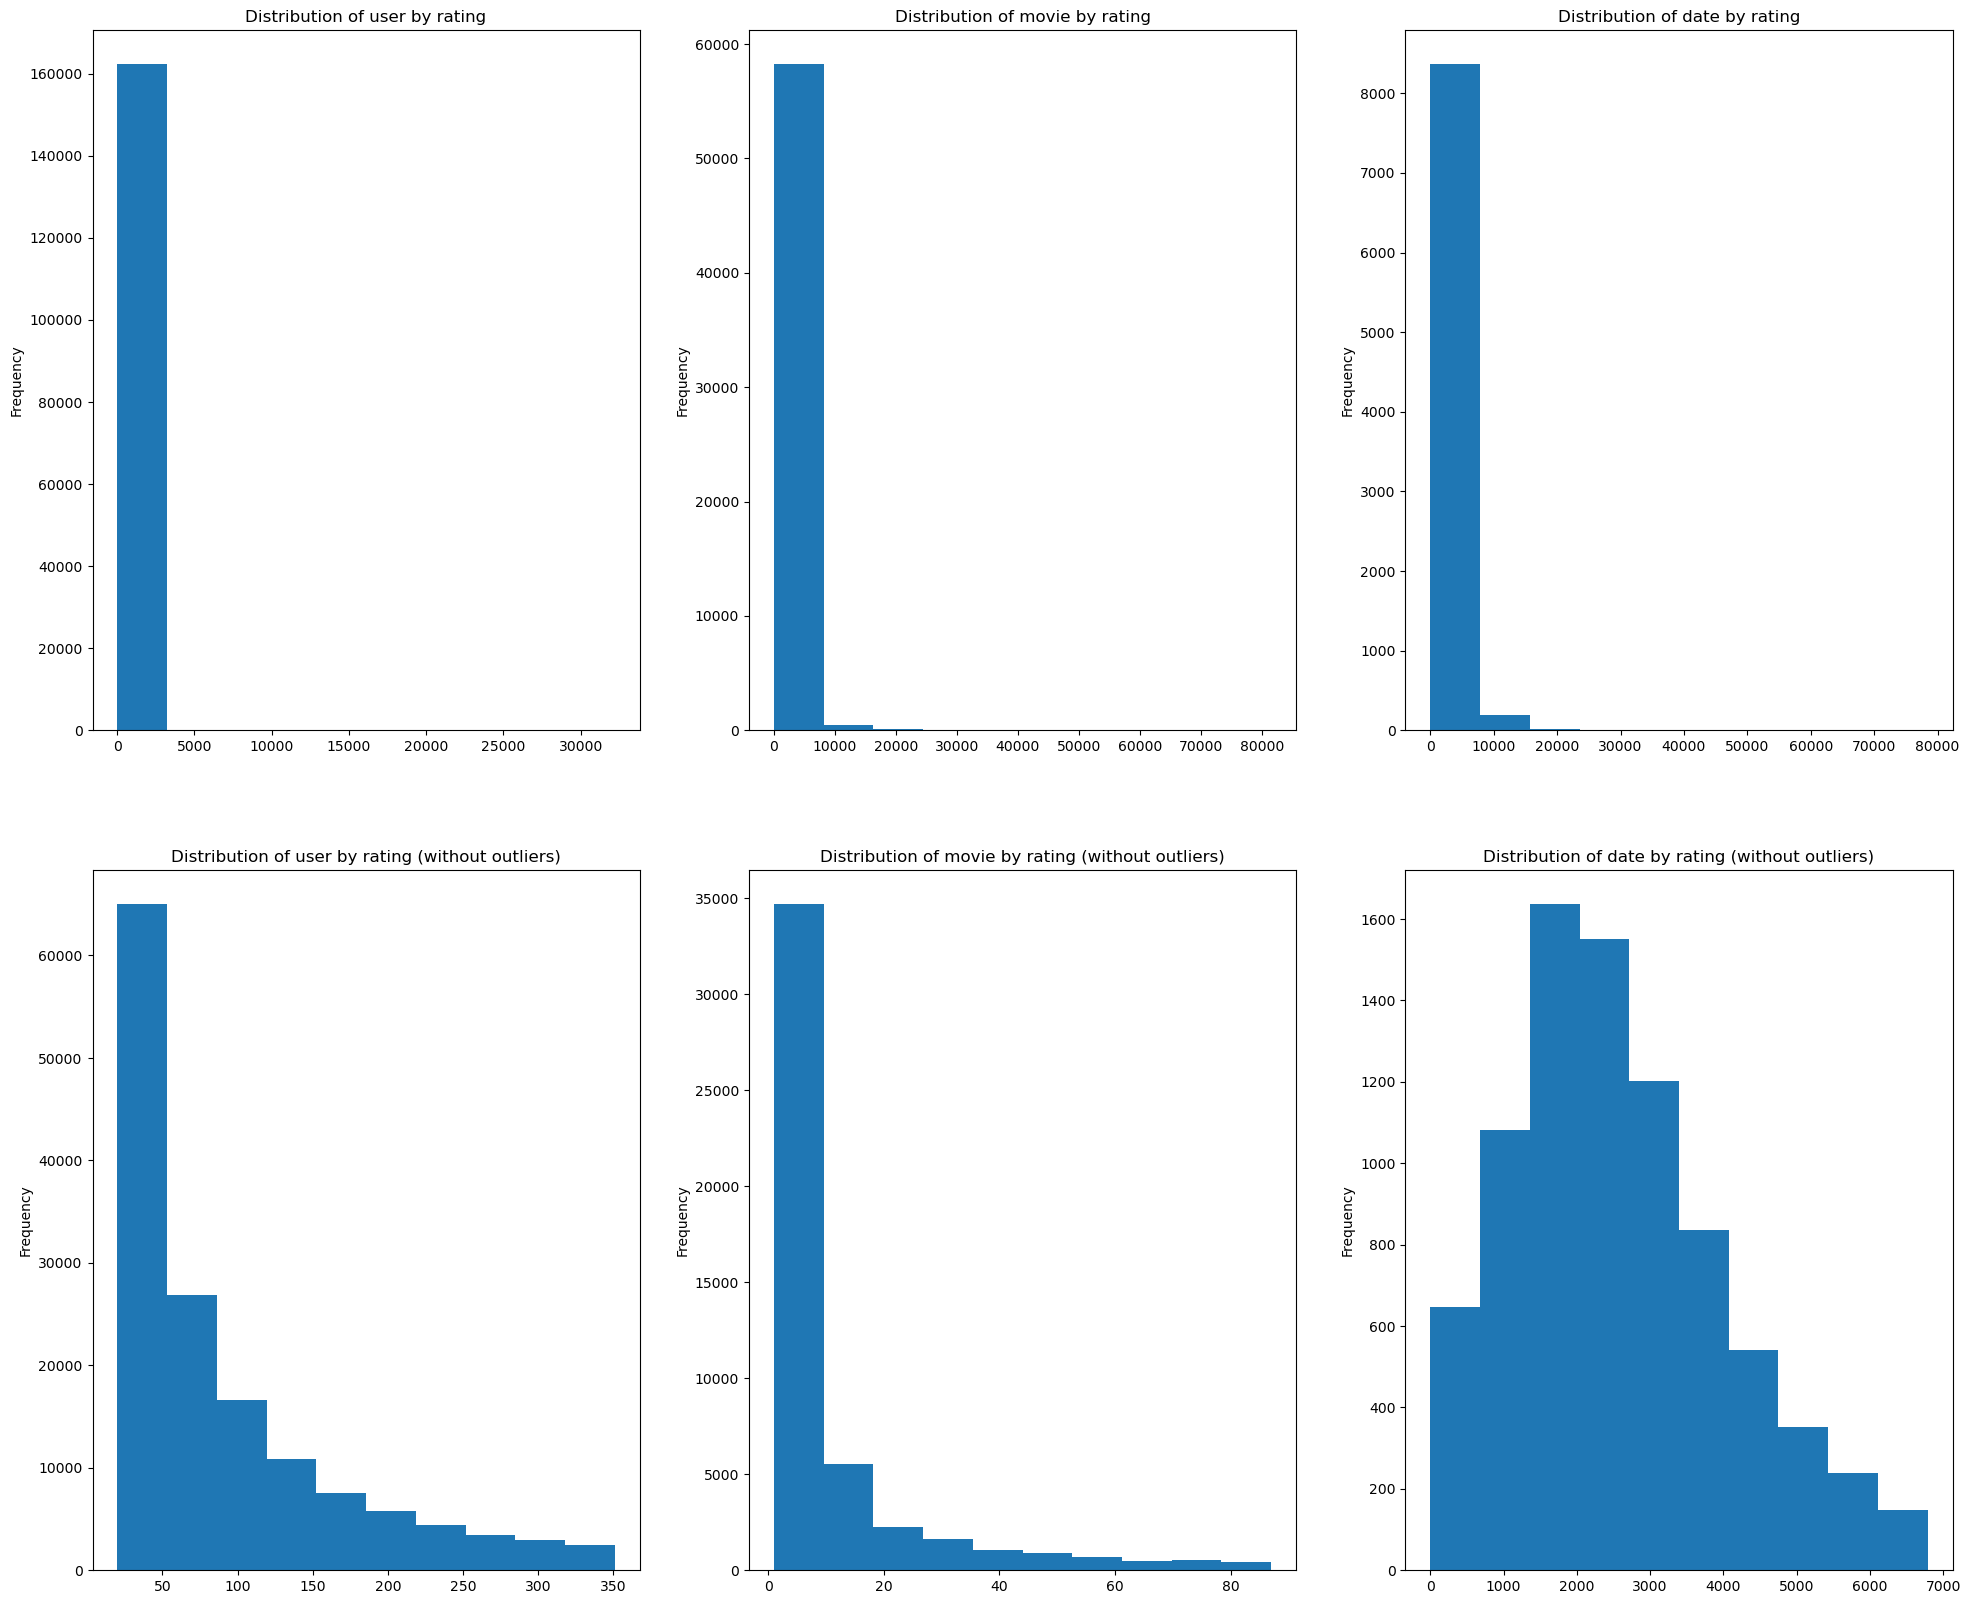

In [41]:
# print(user.plot.kde())
# print(remove_outlier(user).plot.kde())
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(24,20))

user.plot.hist(ax=ax[0,0])
movie.plot.hist(ax=ax[0,1])
date.plot.hist(ax=ax[0,2])

remove_outlier(user).plot.hist(ax=ax[1,0])
remove_outlier(movie).plot.hist(ax=ax[1,1])
remove_outlier(date).plot.hist(ax=ax[1,2])

ax[0,0].set_title('Distribution of user by rating')
ax[0,1].set_title('Distribution of movie by rating')
ax[0,2].set_title('Distribution of date by rating')

ax[1,0].set_title('Distribution of user by rating (without outliers)')
ax[1,1].set_title('Distribution of movie by rating (without outliers)')
ax[1,2].set_title('Distribution of date by rating (without outliers)')

fig.show()

#### Observations
- Users mostly rates movies within around `100` to `200` times.
- Movies mostly are rated by around `0` to `1500` times.

### Movie Release Year Analyse

From the movie title column, we can find that the pattern of the movie title is `MovieName (MovieReleaseYear)`, this section will try to extract the movie release year and perform some basic analysis.

In [42]:
df_movies['title'][0][0:-7]

'Toy Story'

In [43]:
moviesYear = []
for title in df_movies['title']:
    if len(title) > 7 and title[-6] == '(' and title[-1] == ')':
        moviesYear.append(int(title[-5:-1]))
    else: 
        moviesYear.append(None)
df_movies['movieYear'] = moviesYear

In [44]:
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  movieYear  
0  Adventure|Animation|Children|Comedy|Fantasy     1995.0  
1                   Adventure|Children|Fantasy     1995.0  
2                               Comedy|Romance     1995.0  
3                         Comedy|Drama|Romance     1995.0  
4                                       Comedy     1995.0

Now, there is one more `movieYear` column to represent the Movie Release Year.

In [45]:
df_movies['movieYear'].isna().sum()

566

However, some movies title (566) do not contain Movie Release Year

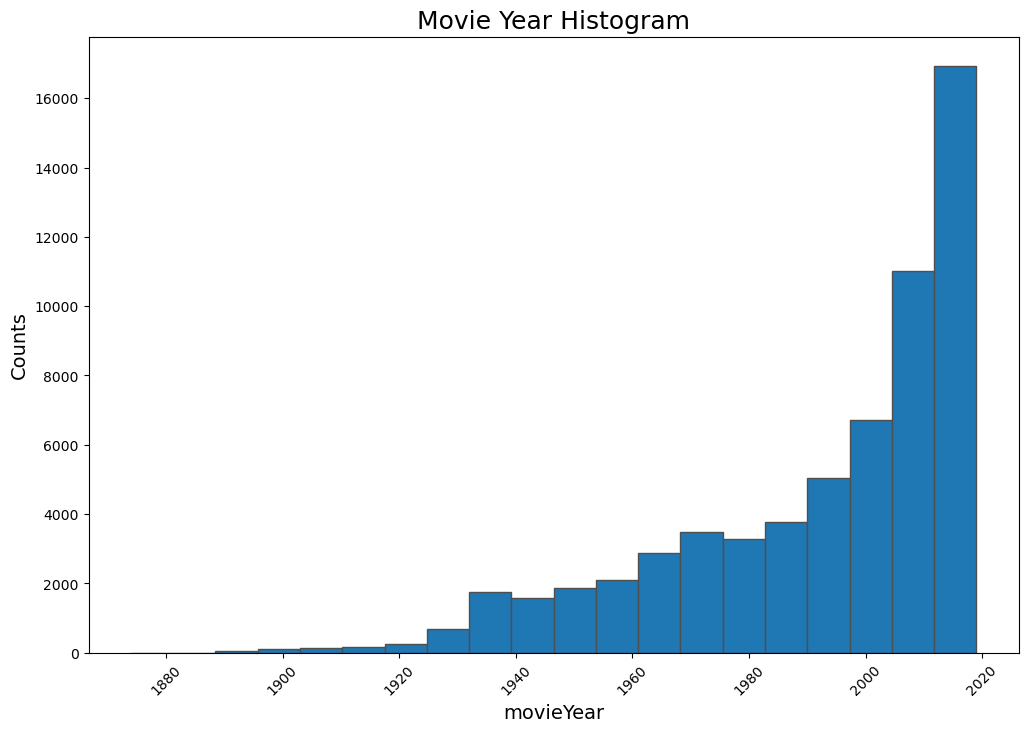

In [46]:
df_movies_dropna=df_movies.dropna()
plt.figure(figsize=(12,8))
plt.title('Movie Year Histogram', fontsize=18)
plt.xlabel('movieYear', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.hist(df_movies_dropna['movieYear'], bins=20, ec='#4f4f4f')
plt.xticks(rotation=45)

plt.show()

#### Observations
- Most of the movies released after 2000

### Handling Null movie release year
- Use average movie release year to fill the missing year

In [47]:
int(df_movies_dropna['movieYear'].mean())

1992

In [48]:
df_movies['movieYear'].fillna(int(df_movies['movieYear'].mean()), inplace=True)

In [49]:
df_movies['movieYear'].isna().sum()

0

After the above processing, there are no more null data from `df_movies`

### Combine the rating and movies table

Now, lets try to combine the rating and movies table.

In [50]:
df_movies_rating = pd.merge(left=df_movies, right=df_rating, on='movieId')
df_movies_rating.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   movieYear  userId  rating        date  
0     1995.0       2     3.5  2006-03-03  
1     1995.0       3     4.0  2015-08-13  
2     1995.0       4     3.0  2019-11-16  
3     1995.0       5     4.0  1997-03-17  
4     1995.0       8     4.0  1998-03-21

In [51]:
df_movies_rating.isnull().sum()

movieId      0
title        0
genres       0
movieYear    0
userId       0
rating       0
date         0
dtype: int64

#### Observations
- No missing data

### Movie rating by Movie Release Year

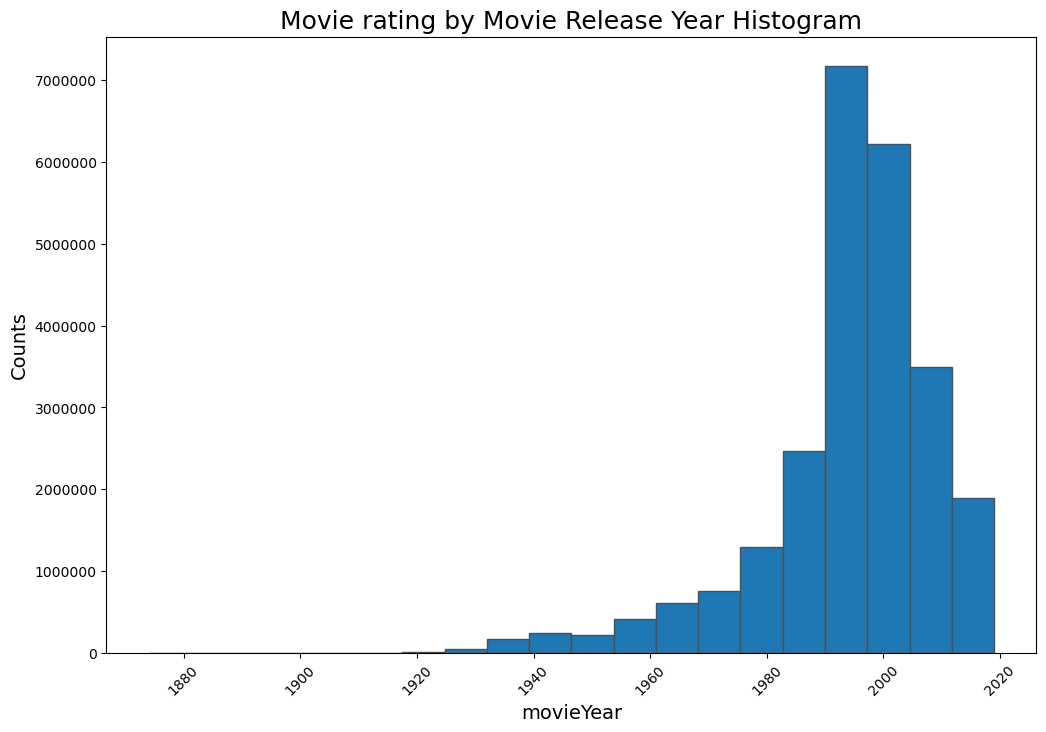

In [52]:
plt.figure(figsize=(12,8))
plt.title('Movie rating by Movie Release Year Histogram', fontsize=18)
plt.xlabel('movieYear', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.hist(df_movies_rating['movieYear'], bins=20, ec='#4f4f4f')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)

plt.show()

#### Observations
- Most of the movie rating is rated to the movie around 1990 to 2005

### Distribution of rating by Genre

In [53]:
df_genre = pd.DataFrame(df_movies_rating['genres'].str.split('|').tolist(), index=df_movies_rating['movieId']).stack()
df_genre = df_genre.reset_index([0, 'movieId'])
df_genre.columns = ['movieId', 'genre']

In [54]:
df_genre

movieId               genre
0               1           Adventure
1               1           Animation
2               1            Children
3               1              Comedy
4               1             Fantasy
...           ...                 ...
67809881   209163               Drama
67809882   209169  (no genres listed)
67809883   209171              Action
67809884   209171           Adventure
67809885   209171               Drama

[67809886 rows x 2 columns]

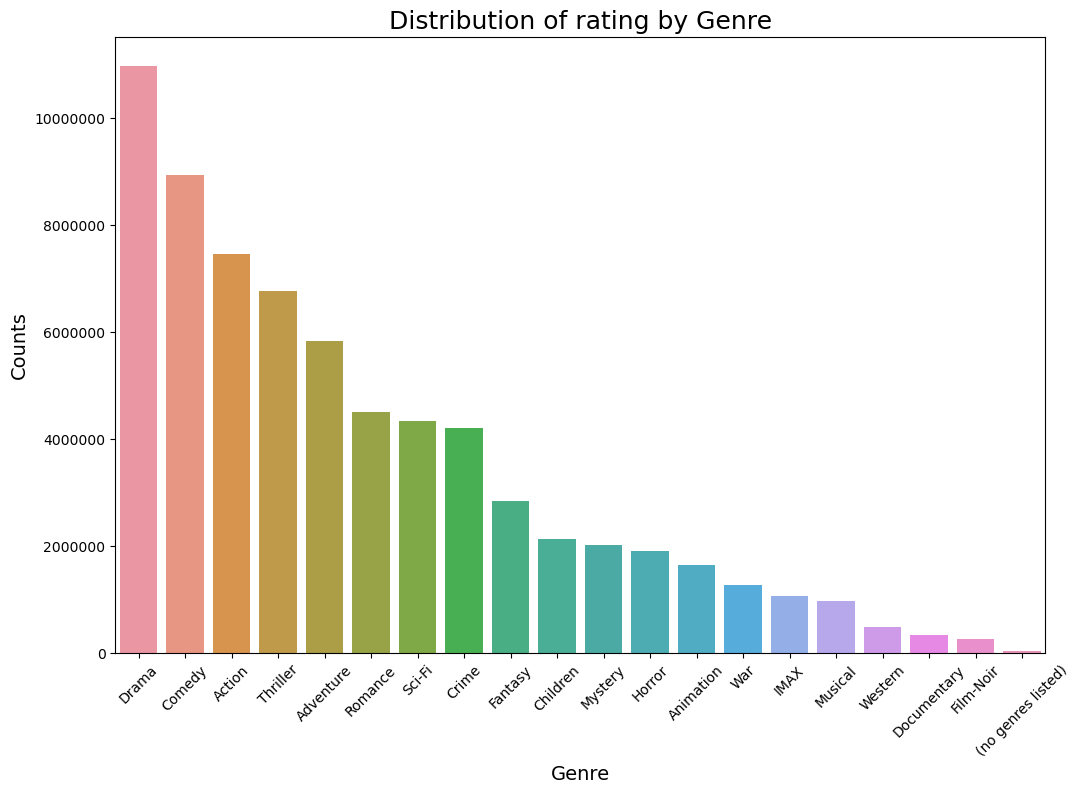

In [55]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='genre', data=df_genre, order = df_genre['genre'].value_counts().index)
# ax = sns.countplot(x='Genre', data=genre_df[:100], order = genre_df['Genre'].value_counts().index)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of rating by Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [190]:
# ratingByGenre = {}
# ratingNumByGenre = {}
# genreList = df_genre['genre'].unique()
# for genre in genreList:
#     ratingByGenre[genre] = [0,0]

In [ ]:
# l = len(df_movies_rating)
# for index, row in df_movies_rating.iterrows():
#     if index % 1000000 == 0: print('{}/{}'.format(index, l))
#     for genre in row['genres'].split('|'):
#         ratingByGenre[genre][0] += row['rating']
#         ratingByGenre[genre][1] += 1

In [ ]:
# meanRatingByGenre = []
# for genre, ratings in ratingByGenre.items():
#     meanRating = ratings[0]/ratings[1]
#     meanRatingByGenre.append([genre, meanRating])

# df_meanRatingByGenre = pd.DataFrame(meanRatingByGenre, columns =['Genre', 'meanRating'])

In [ ]:
# df_meanRatingByGenre.plot()

### Rating Mean by Genre

In [56]:
df_genre_rating = pd.DataFrame(df_movies_rating['genres'].str.split('|').tolist(), index=df_movies_rating['rating']).stack()
df_genre_rating = df_genre_rating.reset_index([0, 'rating'])
df_genre_rating.columns = ['rating', 'genre']

In [57]:
ratingMeanGroupByGenre = df_genre_rating.groupby('genre').mean()
ratingMeanGroupByGenre

rating
genre                       
(no genres listed)  3.326379
Action              3.466592
Adventure           3.517445
Animation           3.614946
Children            3.432507
Comedy              3.423993
Crime               3.685044
Documentary         3.705281
Drama               3.677185
Fantasy             3.511589
Film-Noir           3.925728
Horror              3.293563
IMAX                3.603712
Musical             3.554716
Mystery             3.670169
Romance             3.542712
Sci-Fi              3.478143
Thriller            3.522964
War                 3.791466
Western             3.585755

<Figure size 1200x800 with 0 Axes>

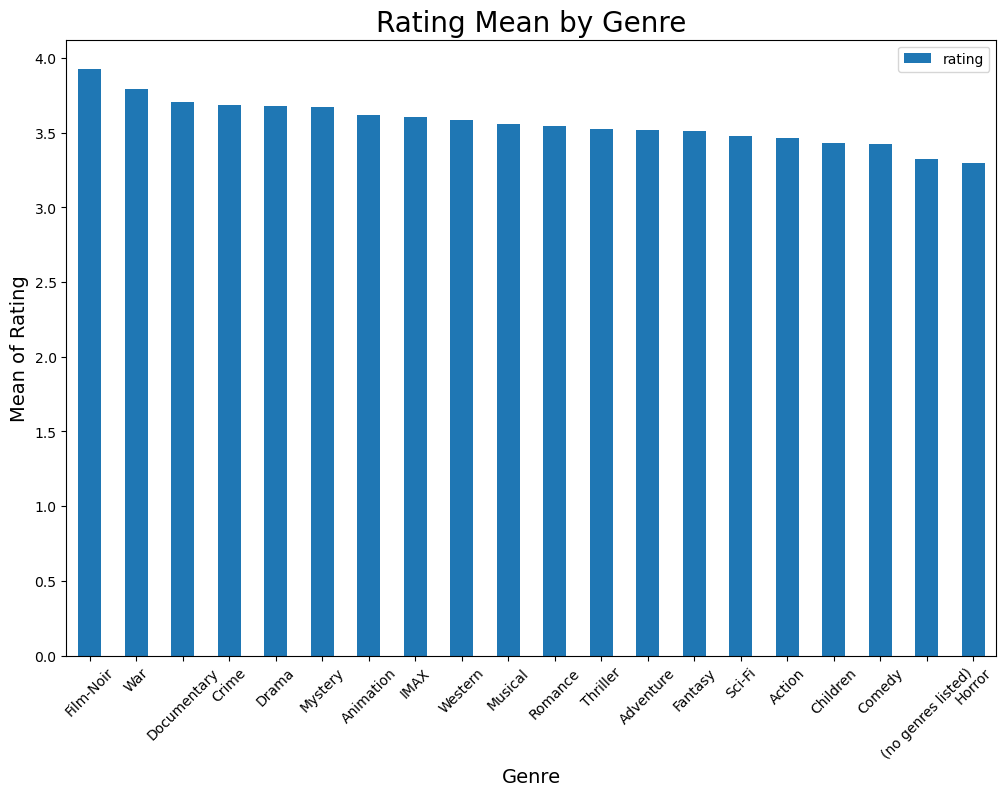

In [58]:
plt.figure(figsize=(12,8))
ax = ratingMeanGroupByGenre.sort_values(by=['rating'], ascending=False).plot.bar(figsize=(12,8))
plt.title('Rating Mean by Genre', fontsize=20)
plt.ylabel('Mean of Rating', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Number of Rating

In [59]:
df_genre_count = df_genre.groupby('genre').count()
df_genre_count

movieId
genre                       
(no genres listed)     26627
Action               7446918
Adventure            5832424
Animation            1630987
Children             2124258
Comedy               8926230
Crime                4190259
Documentary           322449
Drama               10962833
Fantasy              2831585
Film-Noir             247227
Horror               1892183
IMAX                 1063279
Musical               964252
Mystery              2010995
Romance              4497291
Sci-Fi               4325740
Thriller             6763272
War                  1267346
Western               483731

<Figure size 1200x800 with 0 Axes>

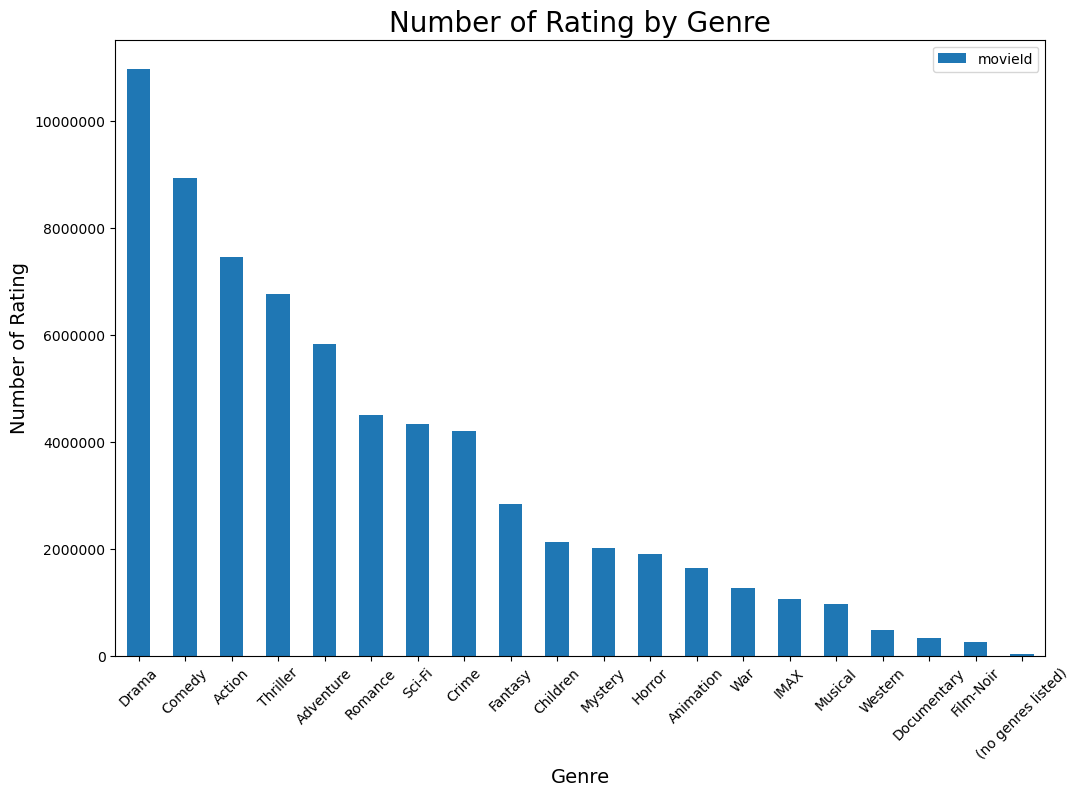

In [60]:
plt.figure(figsize=(12,8))
ax = df_genre_count.sort_values(by=['movieId'], ascending=False).plot.bar(figsize=(12,8))
plt.title('Number of Rating by Genre', fontsize=20)
plt.ylabel('Number of Rating', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Sparsity

$sparsity = 1 - \frac{Number\ of\ non-zero\ element}{Total\ number\ of\ element}$  
  
$Number\ of\ non-zero\ element = count\ of\ rating$  
  
$Total\ number\ of\ element = count\ of\ users * count\ of\ movies$  

In [64]:
sparsity = 1 - (n_ratings / (n_users*m_movies))
print("Sparsity = {:.4f}%".format(sparsity*100))

Sparsity = 99.7395%


In [248]:
report = ProfileReport(df_movies_rating)
report

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [249]:
report.to_file("df_movies_rating_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]